# introduction to neural network classification with tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state=42)


In [2]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Visualize the data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


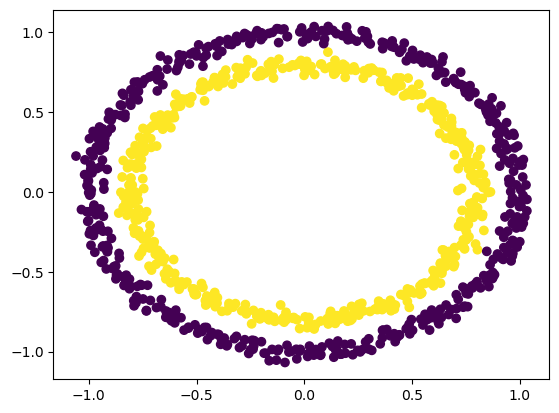

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

## input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[110], y[110]

(array([0.76597921, 0.29169219]), 1)

## steps in modelling

In [9]:
import tensorflow as tf

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 0.7794 - accuracy: 0.4980
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7760 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7725 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7691 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.4980


In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7643 - accuracy: 0.4990


[0.7642950415611267, 0.49900001287460327]

## Improving our model

In [11]:
# improve our model by training longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4970


[0.6931473016738892, 0.4970000088214874]

In [12]:
# improve our model by adding another layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)


In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4930


[0.6938539743423462, 0.49300000071525574]

## visualize our model prediction

In [14]:
import numpy as np


In [15]:

def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


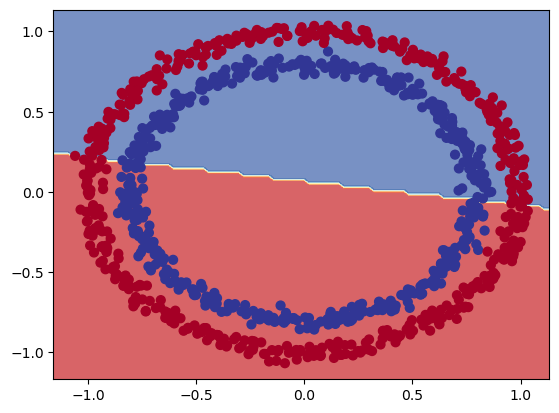

In [16]:
plot_decision_boundary(model_1, X, y)

In [17]:
# improve our model by adding activation function
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6630


[0.668289065361023, 0.6629999876022339]

In [18]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 100

#Split our data 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 9ms/step - loss: 536.7992 - mae: 536.7992
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 427.8700 - mae: 427.8700
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 324.0996 - mae: 324.0996
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 216.7745 - mae: 216.7745
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 104.4581 - mae: 104.4581
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 56.7533 - mae: 56.7533
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 81.5116 - mae: 81.5116
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 63.6793 - mae: 63.6793
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 44.9110 - mae: 44.9110
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 53.4430 - mae: 53.4430
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 7ms/step


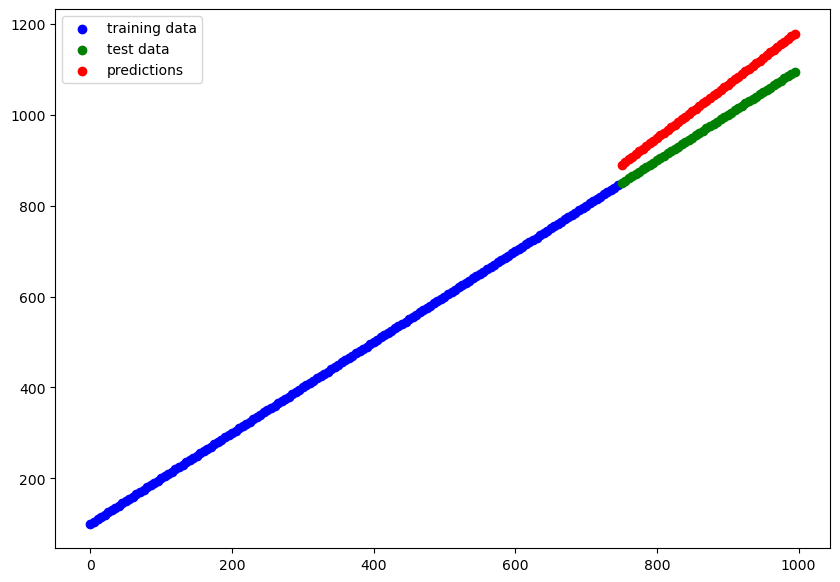

In [19]:
# make predictions with our trained model

y_reg_preds = model_4.predict(X_reg_test)

#plot the model's preditions 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")
plt.legend()

## Non-linearity

In [20]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(lr=0.001), 
               metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.8723 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7556 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6828 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6242 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5380 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4882 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4756 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4656 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4587 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4431 - accuracy: 0.4690
Epoch 11/

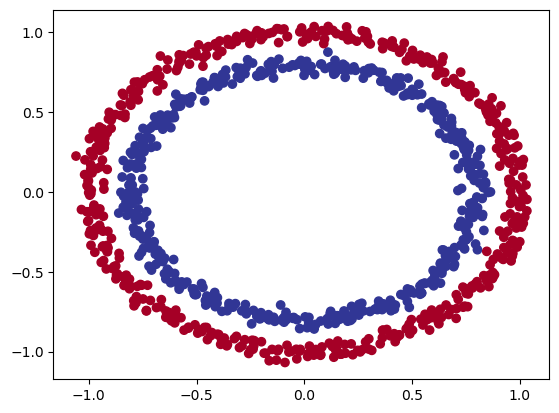

In [21]:
#check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


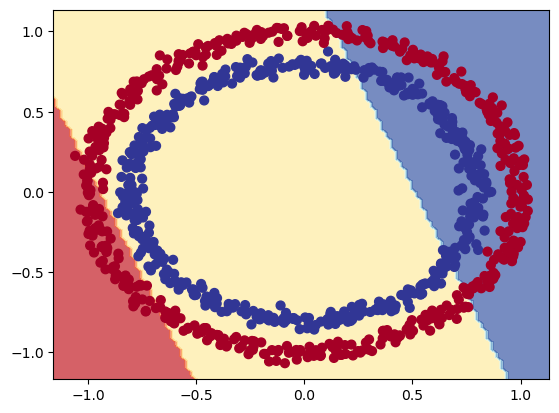

In [22]:
plot_decision_boundary(model_5, X, y)

In [23]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.9675 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9632 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9597 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9575 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9248 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8782 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8520 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8023 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7366 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6953 - accuracy: 0.4770
Epoch 11/

In [27]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.9028 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3472 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9664 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6739 - accuracy: 0.4330
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3808 - accuracy: 0.4000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6319 - accuracy: 0.4520
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1390 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8970 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8626 - accuracy: 0.4750
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


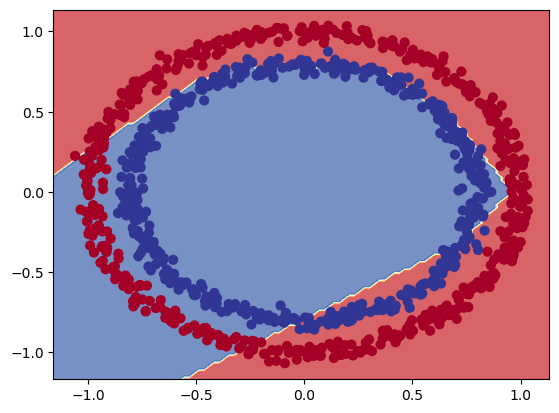

In [28]:
plot_decision_boundary(model_7, X, y)

In [31]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
history = model_8.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 3ms/step - loss: 0.7342 - accuracy: 0.4970
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7221 - accuracy: 0.4890
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.4870
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.4880
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4810
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.4720
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.4660
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4590
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4100
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4070
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


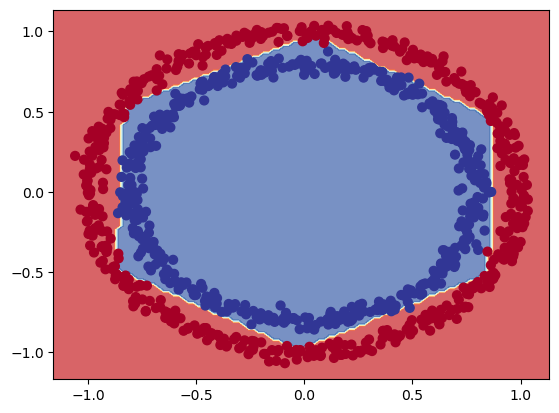

In [32]:
plot_decision_boundary(model_8, X, y)

In [33]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9830


[0.07378033548593521, 0.9829999804496765]